In [ ]:
#!python -m spacy download pt_core_news_sm matplotlib

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df_news = pd.read_csv("../data/noticias_clusterizada.csv")

In [4]:
df_news= df_news.drop(columns=["Unnamed: 0"])

In [3]:
df_news.head()

,Unnamed: 0,page,url,issued,modified,title,body,caption,cleaned_title,cleaned_caption,combined_text,cluster_pca
0,0,13db0ab1-eea2-4603-84c4-f40a876c7400,http://g1.globo.com/am/amazonas/noticia/2022/0...,2022-06-18 20:37:45+00:00,2023-04-15 00:02:08+00:00,Caso Bruno e Dom: 3º suspeito tem prisão tempo...,"Após audiência de custódia, a Justiça do Amazo...",Jeferson da Silva Lima foi escoltado por agent...,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...,caso bruno dom suspeito prisão temporária decr...,3
1,1,92907b73-5cd3-4184-8d8c-e206aed2bf1c,http://g1.globo.com/pa/santarem-regiao/noticia...,2019-06-20 17:19:52+00:00,2023-06-16 20:19:15+00:00,Linguajar dos santarenos é diferenciado e chei...,Vista aérea de Santarém\nÁdrio Denner/ AD Prod...,As expressões santarenas não significam apenas...,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...,linguajar santarenos diferenciado cheio identi...,6
2,2,61e07f64-cddf-46f2-b50c-ea0a39c22050,http://g1.globo.com/mundo/noticia/2022/07/08/e...,2022-07-08 08:55:52+00:00,2023-04-15 04:25:39+00:00,Ex-premiê Shinzo Abe morre após ser baleado no...,Novo vídeo mostra que assassino de Shinzo Abe ...,Ex-primeiro-ministro foi atingido por tiros de...,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...,shinzo abe morre baleado japão atingido tiros ...,3
3,3,30e2e6c5-554a-48ed-a35f-6c6691c8ac9b,http://g1.globo.com/politica/noticia/2021/09/0...,2021-09-09 19:06:46+00:00,2023-06-07 17:44:54+00:00,"Relator no STF, Fachin vota contra marco tempo...","Relator no STF, Fachin vota contra marco tempo...",Ministro defendeu que posse indígena é diferen...,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...,relator stf fachin vota marco temporal demarca...,4
4,4,9dff71eb-b681-40c7-ac8d-68017ac36675,http://g1.globo.com/politica/noticia/2021/09/1...,2021-09-15 19:16:13+00:00,2023-06-07 17:43:39+00:00,"\nApós 2 votos, pedido de vista suspende julga...",Após um pedido de vista (mais tempo para análi...,"Pelo marco temporal, índios só podem reivindic...",votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...,votos pedido vista suspende julgamento stf dem...,6


In [9]:
df_news.shape

(255603, 7)

In [14]:
# Load Portuguese model
nlp = spacy.load("pt_core_news_sm")

# Preprocess function with stopword removal
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)


In [15]:
# Preprocess the dataset
df_news['cleaned_title'] = df_news['title'].apply(preprocess_text)

df_news['cleaned_caption'] = df_news['caption'].apply(preprocess_text)

In [16]:
df_news[["cleaned_title","cleaned_caption"]].head()

,cleaned_title,cleaned_caption
0,caso bruno dom suspeito prisão temporária decr...,jeferson silva lima escoltado agentes polícia ...
1,linguajar santarenos diferenciado cheio identi...,expressões santarenas significam significam co...
2,shinzo abe morre baleado japão,atingido tiros espingarda caseira discursava c...
3,relator stf fachin vota marco temporal demarca...,ministro defendeu posse indígena diferente pos...
4,votos pedido vista suspende julgamento stf dem...,marco temporal índios reivindicar demarcação t...


In [17]:
# Step 1: Combine the two columns into one (you can concatenate them or keep them separate)
df_news['combined_text'] = df_news['cleaned_title'] + " " + df_news['cleaned_caption']

In [5]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_news["combined_text"])

In [6]:
# # Apply K-Means clustering
# num_clusters = 10  # You can adjust this based on your data
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# df_news['cluster'] = kmeans.fit_predict(X)

In [ ]:
# # Evaluate the clustering
# sil_score = silhouette_score(X, kmeans.labels_)
# print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.44


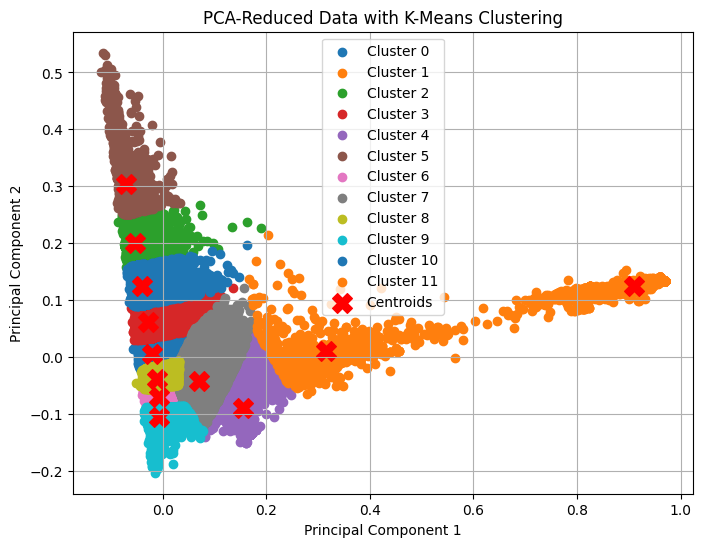

In [11]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 12
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# # Analyze clusters and assign tags
# for cluster in range(num_clusters):
#     print(f"\nCluster {cluster}:")
#     cluster_texts = df_news[df_news['cluster'] == cluster]['title']
#     print(cluster_texts.tolist())

In [ ]:
# df_news.to_csv('filename.csv')

In [ ]:
# df_news.head()

In [33]:
# # Assign tags manually or automatically
# cluster_tags = {
#     0: ,
#     1: ,
#     2: ,
#     3:
#     4:
#     5: "Política",
#     6: ""
#     # 7:
#     8:
#     9:
# }
# df_news['tag'] = df_news['cluster'].map(cluster_tags)

In [ ]:
# # Display the results
# print("\nTagged Articles:")
# print(df_news[['title', 'tag']])


política, economia, emprego, educação, saúde, meio ambiente, tecnologia, ciência, cultura e carros